In [ ]:
pip install mysql-connector-python pandas matplotlib seaborn;

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 45.0 MB/s eta 0:00:00


<ipython-input-19-8b13f83722ec>:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


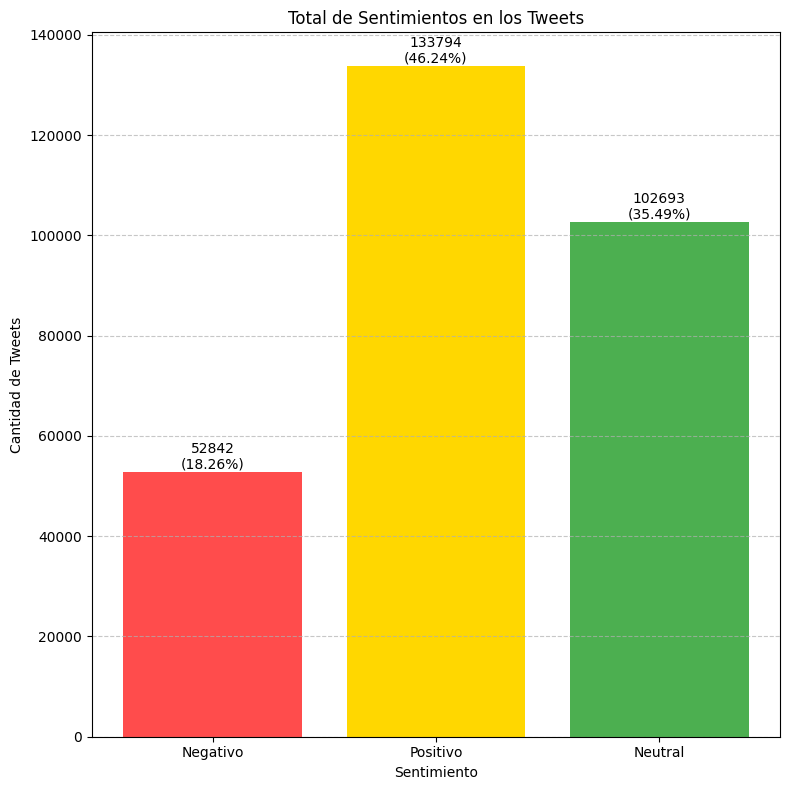

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# Configuración de la conexión a la base de datos MySQL
config = {
    'user': 'ufh0h7rnnbzdjnqe',
    'password': 'Qy1WFQsFl87biOX57L5',
    'host': 'bqoxvhrwpjrlvgovboil-mysql.services.clever-cloud.com',
    'database': 'bqoxvhrwpjrlvgovboil',
    'port': 20344
}

# Establecer la conexión
cnx = mysql.connector.connect(**config)

# Crear un cursor para ejecutar consultas
cursor = cnx.cursor()

# Consultar los sentimientos agrupados y contados
query = """
SELECT feeling, COUNT(*) as cantidad
FROM tweets
GROUP BY feeling;
"""
df = pd.read_sql(query, cnx)

# Cerrar la conexión
cursor.close()
cnx.close()

# Mapear los valores de feelings para que sean más comprensibles
feeling_map = {-1: 'Negativo', 0: 'Neutral', 1: 'Positivo'}
df['feeling'] = df['feeling'].map(feeling_map)

# Calcular el porcentaje
total = df['cantidad'].sum()
df['porcentaje'] = (df['cantidad'] / total * 100).round(2)

# Crear el gráfico de barras
plt.figure(figsize=(8, 8))
colors = ['#FF4C4C', '#FFD700', '#4CAF50']  # Colores para negativo, neutral, positivo
bars = plt.bar(df['feeling'], df['cantidad'], color=colors)
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')
plt.title('Total de Sentimientos en los Tweets')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas de valor y porcentaje encima de cada barra
for bar, cantidad, porcentaje in zip(bars, df['cantidad'], df['porcentaje']):
    y_pos = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, y_pos, f'{cantidad}\n({porcentaje}%)', ha='center', va='bottom')

# Mostrar el gráfico
plt.tight_layout()
plt.show()



In [ ]:
pip install mysql-connector-python pandas matplotlib SQLAlchemy

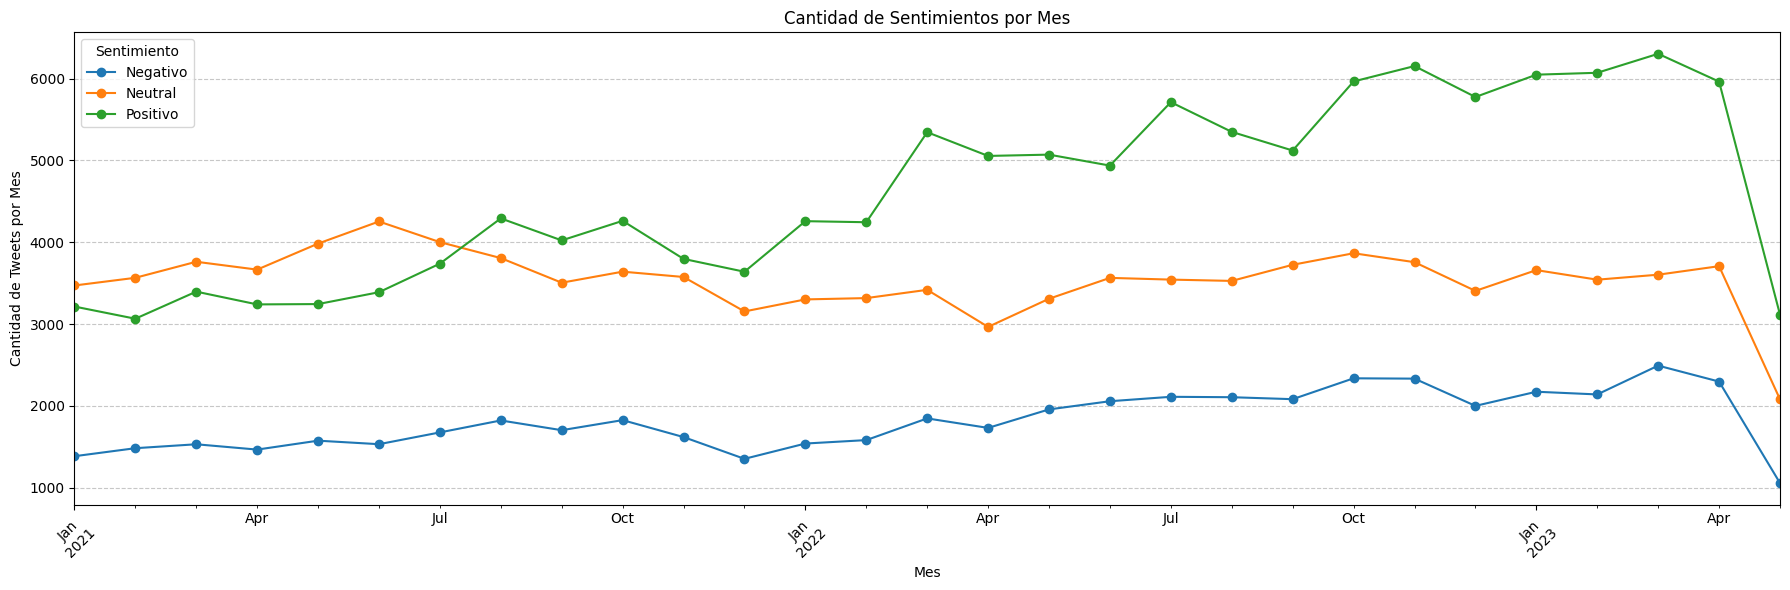

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Configuración de la conexión a la base de datos MySQL
user = 'ufh0h7rnnbzdjnqe'
password = 'Qy1WFQsFl87biOX57L5'
host = 'bqoxvhrwpjrlvgovboil-mysql.services.clever-cloud.com'
database = 'bqoxvhrwpjrlvgovboil'
port = 20344

# Crear la URL de conexión con SQLAlchemy
db_url = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(db_url)

# Consultar la cantidad de tweets por sentimiento y mes
query = """
SELECT DATE_FORMAT(fecha, '%Y-%m') as mes, feeling, COUNT(*) as cantidad
FROM tweets
GROUP BY mes, feeling
ORDER BY mes, feeling;
"""
df = pd.read_sql(query, engine)

# Mapear los valores de feelings para que sean más comprensibles
feeling_map = {-1: 'Negativo', 0: 'Neutral', 1: 'Positivo'}
df['feeling'] = df['feeling'].map(feeling_map)

# Pivotar los datos para facilitar el gráfico
df_pivot = df.pivot(index='mes', columns='feeling', values='cantidad').fillna(0)

# Convertir el índice de 'mes' a un objeto datetime para formatear adecuadamente
df_pivot.index = pd.to_datetime(df_pivot.index, format='%Y-%m')

# Crear el gráfico de líneas
plt.figure(figsize=(18, 6))
ax = df_pivot.plot(kind='line', marker='o', ax=plt.gca())

# # Etiquetar cada punto con el mes y el año
# for col in df_pivot.columns:
#     for idx, value in enumerate(df_pivot[col]):
#         label = df_pivot.index[idx]
#         ax.text(label, value, f'{label.strftime("%b-%Y")}', ha='right', va='bottom', fontsize=8)

plt.xlabel('Mes')
plt.ylabel('Cantidad de Tweets por Mes')
plt.title('Cantidad de Sentimientos por Mes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()





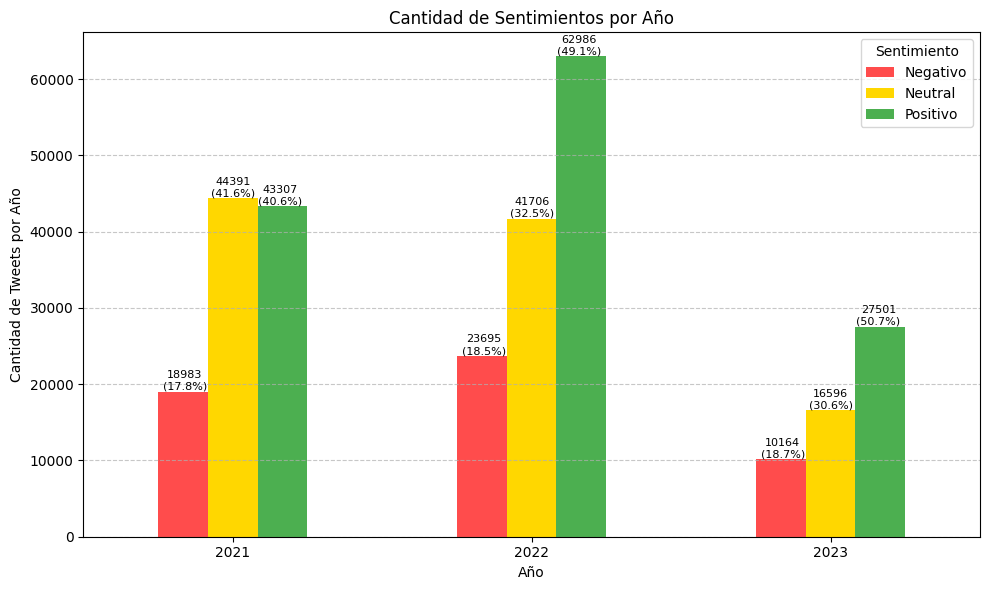

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Configuración de la conexión a la base de datos MySQL
user = 'ufh0h7rnnbzdjnqe'
password = 'Qy1WFQsFl87biOX57L5'
host = 'bqoxvhrwpjrlvgovboil-mysql.services.clever-cloud.com'
database = 'bqoxvhrwpjrlvgovboil'
port = 20344

# Crear la URL de conexión con SQLAlchemy
db_url = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(db_url)

# Consultar la cantidad de tweets por sentimiento y año
query = """
SELECT DATE_FORMAT(fecha, '%Y') as anio, feeling, COUNT(*) as cantidad
FROM tweets
GROUP BY anio, feeling
ORDER BY anio, feeling;
"""
df = pd.read_sql(query, engine)

# Mapear los valores de feelings para que sean más comprensibles
feeling_map = {-1: 'Negativo', 0: 'Neutral', 1: 'Positivo'}
df['feeling'] = df['feeling'].map(feeling_map)

# Pivotar los datos para facilitar el gráfico
df_pivot = df.pivot(index='anio', columns='feeling', values='cantidad').fillna(0)

# Convertir el índice de 'anio' a un objeto datetime para formatear adecuadamente
df_pivot.index = pd.to_datetime(df_pivot.index, format='%Y').year

# Calcular el porcentaje para cada columna
df_percent = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
colors = ['#FF4C4C', '#FFD700', '#4CAF50']  # Colores para negativo, neutral, positivo
ax = df_pivot.plot(kind='bar', stacked=False, color=colors, ax=plt.gca(), rot=0)

# Añadir etiquetas de valor y porcentaje encima de cada barra
alignment = {'Negativo': -0.16, 'Neutral': 0, 'Positivo': 0.16}
for idx in range(len(df_pivot)):
    total = df_pivot.iloc[idx].sum()
    for col in df_pivot.columns:
        value = df_pivot[col].iloc[idx]
        percentage = df_percent[col].iloc[idx]
        label = f'{int(value)}\n({percentage:.1f}%)'
        x_pos = idx + alignment[col]
        ax.text(x_pos, value, label, ha='center', va='bottom', fontsize=8)

plt.xlabel('Año')
plt.ylabel('Cantidad de Tweets por Año')
plt.title('Cantidad de Sentimientos por Año')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()




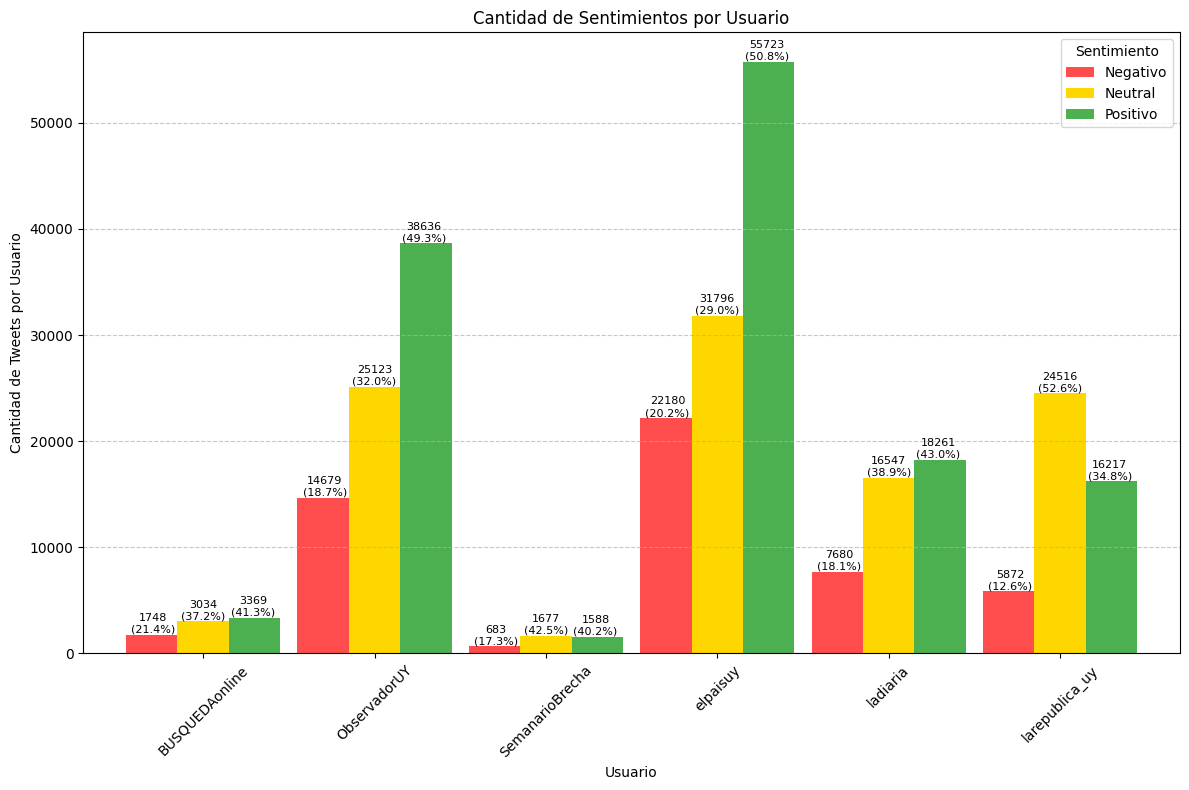

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Configuración de la conexión a la base de datos MySQL
user = 'ufh0h7rnnbzdjnqe'
password = 'Qy1WFQsFl87biOX57L5'
host = 'bqoxvhrwpjrlvgovboil-mysql.services.clever-cloud.com'
database = 'bqoxvhrwpjrlvgovboil'
port = 20344

# Crear la URL de conexión con SQLAlchemy
db_url = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(db_url)

# Consultar la cantidad de sentimientos por usuario
query = """
SELECT u.nombre, t.feeling, COUNT(*) as cantidad
FROM tweets t
JOIN usuarios u ON t.usuario = u.id
GROUP BY u.nombre, t.feeling
ORDER BY u.nombre, t.feeling;
"""
df = pd.read_sql(query, engine)

# Mapear los valores de feelings para que sean más comprensibles
feeling_map = {-1: 'Negativo', 0: 'Neutral', 1: 'Positivo'}
df['feeling'] = df['feeling'].map(feeling_map)

# Pivotar los datos para facilitar el gráfico
df_pivot = df.pivot(index='nombre', columns='feeling', values='cantidad').fillna(0)

# Calcular el porcentaje para cada columna
df_percent = df_pivot.div(df_pivot.sum(axis=1), axis=0) * 100

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
colors = ['#FF4C4C', '#FFD700', '#4CAF50']  # Colores para negativo, neutral, positivo
ax = df_pivot.plot(kind='bar', stacked=False, color=colors, ax=plt.gca(), width=0.9, rot=45)

# Añadir etiquetas de valor y porcentaje encima de cada barra
alignment = {'Negativo': -0.29, 'Neutral': 0, 'Positivo': 0.29}
for idx in range(len(df_pivot)):
    total = df_pivot.iloc[idx].sum()
    for col in df_pivot.columns:
        value = df_pivot[col].iloc[idx]
        percentage = df_percent[col].iloc[idx]
        label = f'{int(value)}\n({percentage:.1f}%)'
        x_pos = idx + alignment[col]
        ax.text(x_pos, value, label, ha='center', va='bottom', fontsize=8)

plt.xlabel('Usuario')
plt.ylabel('Cantidad de Tweets por Usuario')
plt.title('Cantidad de Sentimientos por Usuario')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()


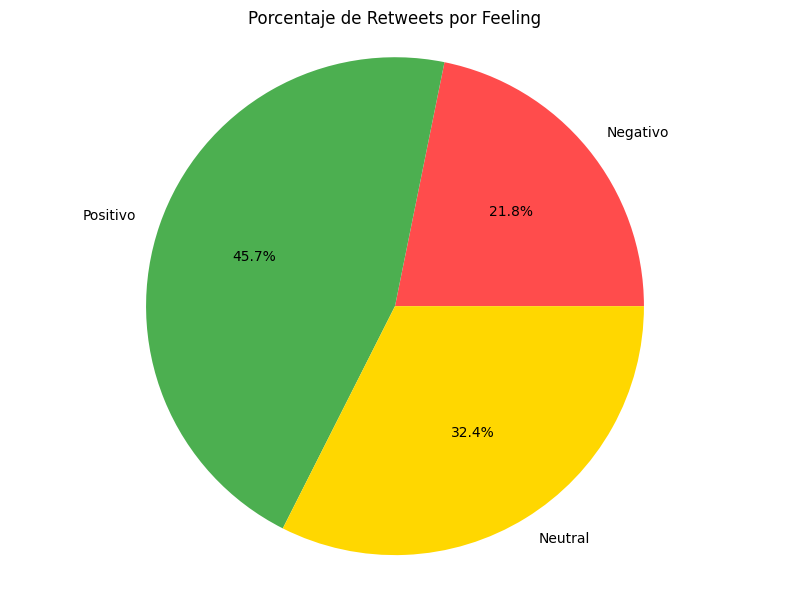

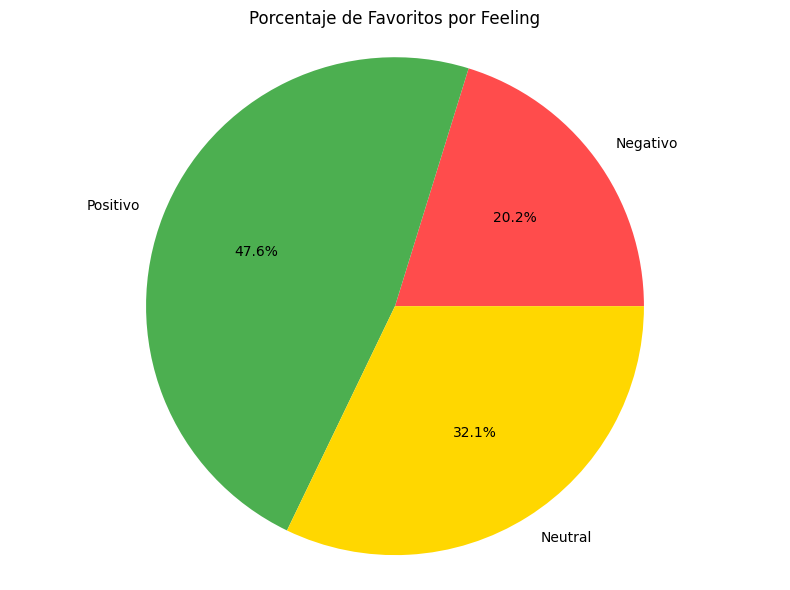

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Configuración de la conexión a la base de datos MySQL
user = 'ufh0h7rnnbzdjnqe'
password = 'Qy1WFQsFl87biOX57L5'
host = 'bqoxvhrwpjrlvgovboil-mysql.services.clever-cloud.com'
database = 'bqoxvhrwpjrlvgovboil'
port = 20344

# Crear la URL de conexión con SQLAlchemy
db_url = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(db_url)

# Consultar la cantidad total de retweets por feeling
query_retweets = """
SELECT feeling, SUM(retweets) as total_retweets
FROM tweets
GROUP BY feeling;
"""
df_retweets = pd.read_sql(query_retweets, engine)

# Consultar la cantidad total de favoritos por feeling
query_favorites = """
SELECT feeling, SUM(favoritos) as total_favoritos
FROM tweets
GROUP BY feeling;
"""
df_favorites = pd.read_sql(query_favorites, engine)

# Mapear los valores de feelings y definir los colores
feeling_map = {-1: 'Negativo', 0: 'Neutral', 1: 'Positivo'}
colors = ['#FF4C4C', '#4CAF50',  '#FFD700']

# Calcular el porcentaje para retweets
total_retweets = df_retweets['total_retweets'].sum()
df_retweets['percentage'] = (df_retweets['total_retweets'] / total_retweets) * 100

# Calcular el porcentaje para favoritos
total_favoritos = df_favorites['total_favoritos'].sum()
df_favorites['percentage'] = (df_favorites['total_favoritos'] / total_favoritos) * 100

# Crear el gráfico de pastel para retweets
plt.figure(figsize=(8, 6))
plt.pie(df_retweets['percentage'], labels=[feeling_map[feeling] for feeling in df_retweets['feeling']], autopct='%1.1f%%', colors=colors)
plt.title('Porcentaje de Retweets por Feeling')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plt.tight_layout()
plt.show()

# Crear el gráfico de pastel para favoritos
plt.figure(figsize=(8, 6))
plt.pie(df_favorites['percentage'], labels=[feeling_map[feeling] for feeling in df_favorites['feeling']], autopct='%1.1f%%', colors=colors)
plt.title('Porcentaje de Favoritos por Feeling')
plt.axis('equal')  # Para asegurarse de que el gráfico sea un círculo
plt.tight_layout()
plt.show()



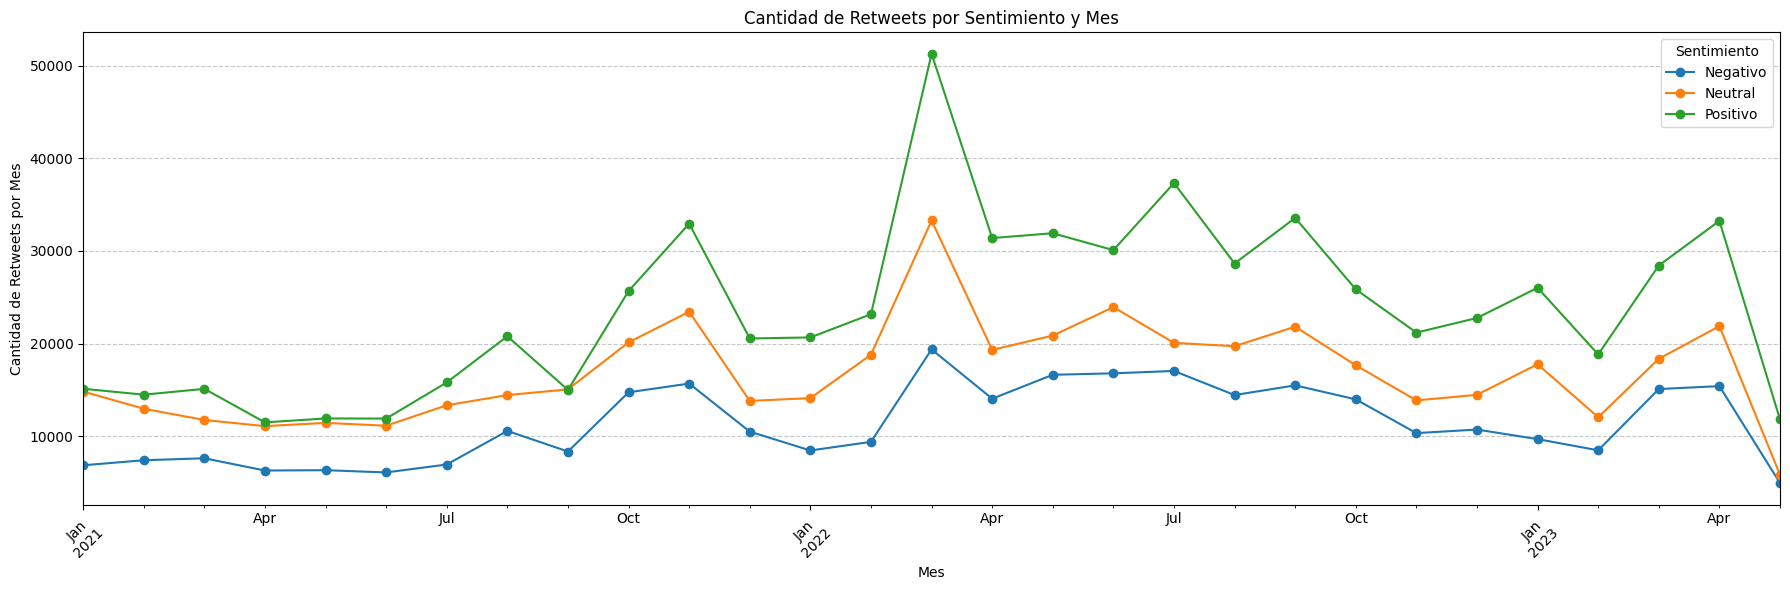

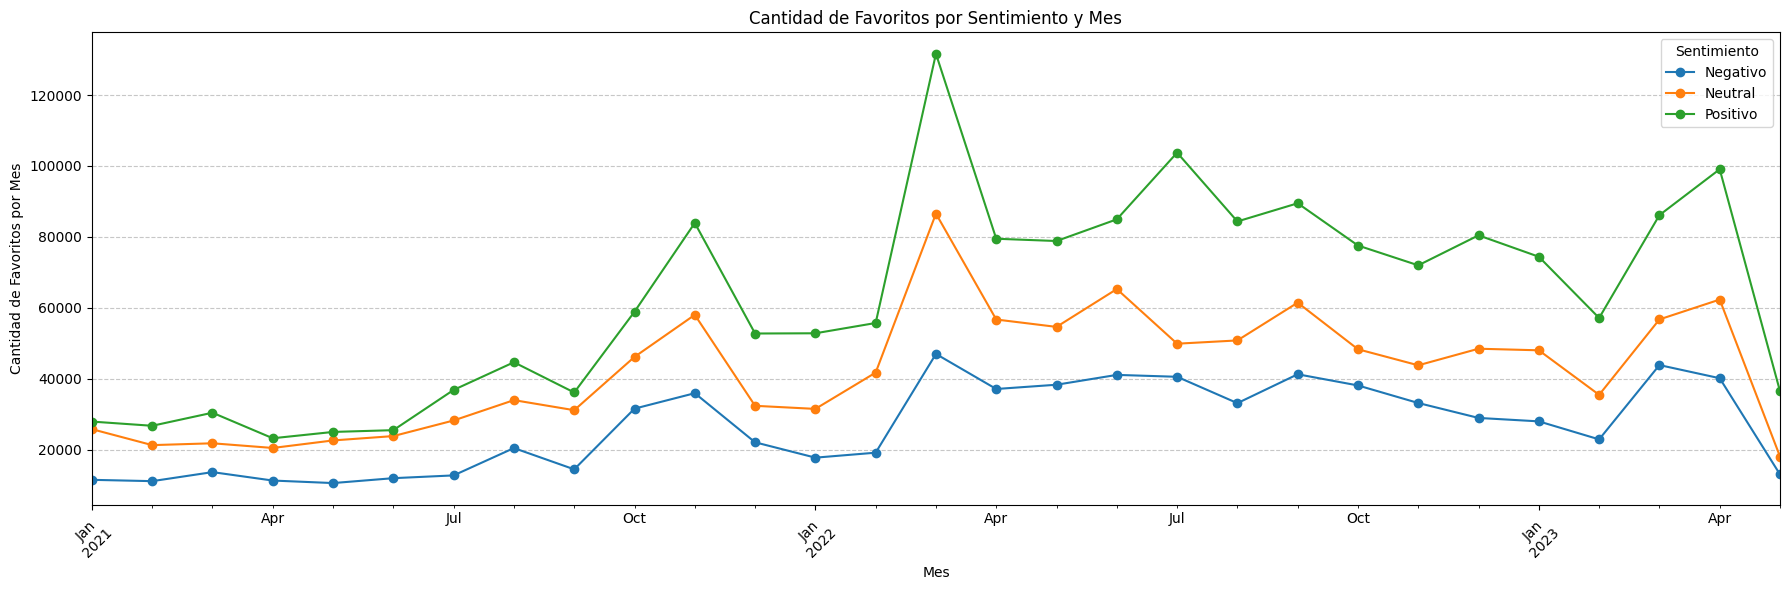

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Configuración de la conexión a la base de datos MySQL
user = 'ufh0h7rnnbzdjnqe'
password = 'Qy1WFQsFl87biOX57L5'
host = 'bqoxvhrwpjrlvgovboil-mysql.services.clever-cloud.com'
database = 'bqoxvhrwpjrlvgovboil'
port = 20344

# Crear la URL de conexión con SQLAlchemy
db_url = f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(db_url)

# Consultar la cantidad de retweets por sentimiento y mes
query_retweets = """
SELECT DATE_FORMAT(fecha, '%Y-%m') as mes, feeling, SUM(retweets) as total_retweets
FROM tweets
GROUP BY mes, feeling
ORDER BY mes, feeling;
"""
df_retweets = pd.read_sql(query_retweets, engine)

# Consultar la cantidad de favoritos por sentimiento y mes
query_favorites = """
SELECT DATE_FORMAT(fecha, '%Y-%m') as mes, feeling, SUM(favoritos) as total_favoritos
FROM tweets
GROUP BY mes, feeling
ORDER BY mes, feeling;
"""
df_favorites = pd.read_sql(query_favorites, engine)

# Mapear los valores de feelings para que sean más comprensibles
feeling_map = {-1: 'Negativo', 0: 'Neutral', 1: 'Positivo'}
df_retweets['feeling'] = df_retweets['feeling'].map(feeling_map)
df_favorites['feeling'] = df_favorites['feeling'].map(feeling_map)

# Pivotar los datos para facilitar el gráfico
df_pivot_retweets = df_retweets.pivot(index='mes', columns='feeling', values='total_retweets').fillna(0)
df_pivot_favorites = df_favorites.pivot(index='mes', columns='feeling', values='total_favoritos').fillna(0)

# Convertir el índice de 'mes' a un objeto datetime para formatear adecuadamente
df_pivot_retweets.index = pd.to_datetime(df_pivot_retweets.index, format='%Y-%m')
df_pivot_favorites.index = pd.to_datetime(df_pivot_favorites.index, format='%Y-%m')

# Crear el gráfico de líneas para retweets
plt.figure(figsize=(18, 6))
ax = df_pivot_retweets.plot(kind='line', marker='o', ax=plt.gca())

plt.xlabel('Mes')
plt.ylabel('Cantidad de Retweets por Mes')
plt.title('Cantidad de Retweets por Sentimiento y Mes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()

# Crear el gráfico de líneas para favoritos
plt.figure(figsize=(18, 6))
ax = df_pivot_favorites.plot(kind='line', marker='o', ax=plt.gca())

plt.xlabel('Mes')
plt.ylabel('Cantidad de Favoritos por Mes')
plt.title('Cantidad de Favoritos por Sentimiento y Mes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentimiento')
plt.tight_layout()
plt.show()
